<a href="https://colab.research.google.com/github/Daniel-Sottovia/PayFace_Daniel/blob/main/FASNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FASNet
from article: **A New Approach for Face Anti-Spoofing Using Handcrafted and Deep Network Features**

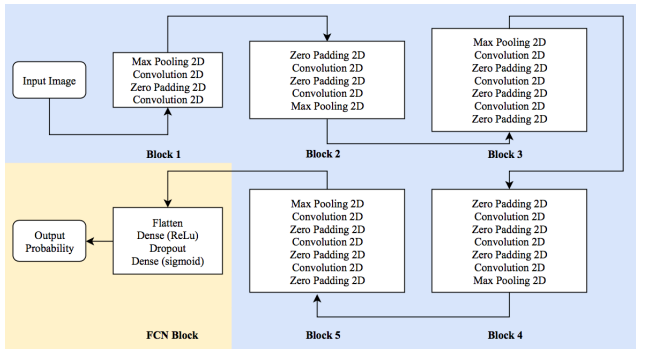

In [6]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

class FASNet():
    def __init__(self, input_shape = (224, 224, 3), weights = None):
        self.model = self.create_model(input_shape=input_shape)

    def create_model(self, input_shape):
        model = tf.keras.Sequential([

            # Block 1
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="block1_conv1", input_shape=(224,224,3), trainable=False),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="block1_conv2", trainable=False),
            tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name="block1_pool", trainable=False),

            # Block 2
            tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="block2_conv1", trainable=False),
            tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="block2_conv2", trainable=False),
            tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name="block2_pool", trainable=False),

            # Block 3
            tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", name="block3_conv1", trainable=False),
            tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", name="block3_conv2", trainable=False),
            tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", name="block3_conv3", trainable=False),
            tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name="block3_pool", trainable=False),

            # Block 4
            tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same", name="block4_conv1", trainable=True),
            tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same", name="block4_conv2", trainable=True),
            tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same", name="block4_conv3", trainable=True),
            tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name="block4_pool", trainable=True),

            # Block 5
            tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same", name="block5_conv1", trainable=True),
            tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same", name="block5_conv2", trainable=True),
            tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same", name="block5_conv3", trainable=True),
            tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name="block5_pool", trainable=True),

            # Classification Block
            tf.keras.layers.Flatten(name='flatten'),
            tf.keras.layers.Dense(4096, activation='relu', name='fc1'),
            tf.keras.layers.Dense(4096, activation='relu', name='fc2'),
            tf.keras.layers.Dense(1000, activation='softmax', name='predictions')

        ])

        WEIGHTS_PATH = (
                            "https://storage.googleapis.com/tensorflow/keras-applications/"
                            "vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5"
                            )

        weights = tf.keras.utils.get_file(
                                  "vgg16_weights_tf_dim_ordering_tf_kernels.h5",
                                  WEIGHTS_PATH,
                                  cache_subdir="models",
                                  file_hash= "64373286793e3c8b2b4e3219cbf3544b")
    
     
        model.load_weights(weights)

        # Tem que fazer a mesma parada dos outros modelos, tirar a parte convulucional e colocar uma nova;
        model2 = tf.keras.Sequential()
        for layer in model.layers[:-3]:
            model2.add(layer)
        
        model2.add(tf.keras.layers.Dense(256, activation='relu', name='fc1', trainable= True)),
        model2.add(tf.keras.layers.Dropout(0.5))
        model2.add(tf.keras.layers.Dense(2, activation='sigmoid', name='predictions_article', trainable= True))

        # Learning_rate = 10^-4
        model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, 
                                                      beta_1=0.9, 
                                                      beta_2=0.999,
                                                      epsilon=1e-08), 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

        return model2

In [8]:
if __name__ == '__main__':
    modelo = FASNet()
    modelo.model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [5]:
for layer in modelo.model.layers:
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
modelo.model.get_weights()